In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import yfinance as yf 
plt.style.use('ggplot')

# Import Stock Historical Price

In [61]:
start_date = '2021-01-02'
end_date   = '2022-01-02'


ticks     = yf.Ticker("TSLA")
Stock_DF  = ticks.history(start=start_date, end=end_date)
Stock_DF

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,0,0
2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,0,0
2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,0,0
2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,0,0
2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,0,0
...,...,...,...,...,...,...,...
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,23715300,0,0
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,20108000,0,0
2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,18718000,0,0


# Estimate Annual Reutrn and Annual Volatility and Parameters Setting

In [118]:
u     = np.mean(Stock_DF['Close'].pct_change()) * 252
sigma = np.std(Stock_DF['Close'].pct_change())  * np.sqrt(252)

t  = 1 
n  = 10
s0 = Stock_DF['Close'][0]

trial       = 10
price_path  = []


# (1.) Method with Double For Loop

$$ dS = \mu \cdot S dt + \sigma \cdot S dW_{t} $$

Using Ito Lemma and let f = lns , we will get the following formula

$$ S_{T} = S_{t} \cdot exp[(u-\frac{\sigma^2}{2})*(\frac{t}{n}) + \sigma * \Delta \cdot W_{T}] $$

In [119]:
Simulation_DF = pd.DataFrame()


for j in range(trial):

    st          = s0 
    price_path  = [s0]

    for i in range(n):

        st = st * np.exp(( u-0.5*sigma**2)*(t/n) + sigma * np.sqrt(t/n) * np.random.normal(0,1))
        price_path.append(np.round(st,decimals=4))
    
    Simulation_DF['Trial '+str(j)] = price_path



Simulation_DF

,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9
0,729.77002,729.77002,729.77002,729.77002,729.77002,729.77002,729.77002,729.77002,729.77002,729.77002
1,711.59610,838.92550,704.65200,702.80310,1093.62740,545.86580,747.20770,694.36560,796.02910,753.41930
2,710.45340,766.39880,606.51950,766.73930,853.86640,701.27750,971.22550,767.40030,757.86350,794.60510
3,829.93880,645.88660,649.49400,856.87850,852.17740,649.58740,1162.53020,801.57210,985.75370,850.05930
4,720.61800,655.41330,956.72950,741.00030,759.40240,874.65620,1401.78060,879.21640,1325.36140,741.88950
5,918.73680,773.29900,1148.00330,820.38280,760.35520,696.72290,1348.66240,1391.93340,1291.56080,652.88640
6,1109.04190,667.89930,1095.36950,713.05380,621.88680,716.69020,1893.10820,1891.77130,1581.58070,734.28370
7,1309.71610,653.29310,1212.37220,509.13200,664.15560,738.70860,1333.37180,2130.00760,1409.60920,867.84930
8,1591.09770,619.18630,1514.71900,626.90350,1068.53210,620.07420,1327.83750,2270.60970,1498.61590,1240.64930
9,1632.63940,608.83800,1474.49370,617.29700,982.58690,730.55210,1942.06030,2265.46390,1534.58460,1112.17290


- plot the process

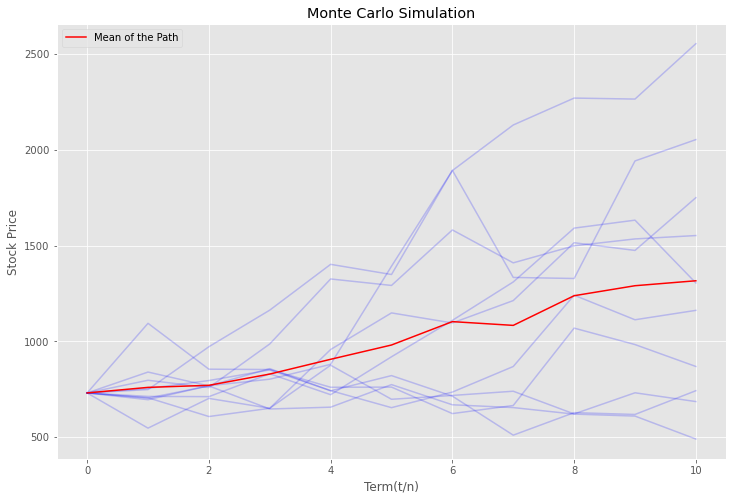

In [120]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_title('Monte Carlo Simulation')

for i in range(Simulation_DF.shape[1]):
    plt.plot(Simulation_DF['Trial '+str(i)],color='blue',alpha=0.2)

plt.plot(Simulation_DF.mean(axis=1),color='red',linestyle='-',label='Mean of the Path')
ax.set_xlabel('Term(t/n)')
ax.set_ylabel('Stock Price')
ax.legend()
plt.show()

# (2) Method with Array Cunsum

In [123]:
Simulation_DF = pd.DataFrame()

for j in range(trial):

    price_path = np.exp((u-0.5*sigma**2)*(t/n) + sigma * np.sqrt(t/n) * np.random.normal(0,1,10)).cumprod() * s0
    price_path = np.hstack([np.array([s0]),price_path])
    
    Simulation_DF['Trial '+str(j)] = price_path

Simulation_DF 

,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9
0,729.770020,729.770020,729.770020,729.770020,729.770020,729.770020,729.770020,729.770020,729.770020,729.770020
1,558.304887,731.100605,535.727940,751.005863,745.333594,696.280922,930.132947,947.823444,733.060591,757.929786
2,544.225289,892.993859,614.572622,710.515191,1052.232613,834.231246,682.181694,1227.949313,774.564059,784.570456
3,642.956075,1081.093930,566.412395,726.928172,1246.742557,746.427155,802.834734,783.737693,1012.186983,936.539651
4,783.044479,955.168763,631.292544,893.716600,1196.473714,713.010310,583.568185,815.465634,1121.782451,1069.074739
5,1184.819554,1325.373094,847.401218,1087.190418,1468.231327,657.953764,684.818488,973.799471,1069.421841,1135.691980
6,1131.495641,1169.367898,715.613066,1581.682219,1346.814973,875.449192,760.060161,797.927857,893.084491,1120.205273
7,785.134212,1226.584062,821.052449,1779.027394,1386.331562,784.067450,950.075540,863.137785,1024.463294,1231.243083
8,839.136822,865.008242,864.256462,1670.935943,2268.160387,847.441700,1029.463132,922.741458,1166.602019,1294.033170
9,894.147816,764.107377,986.330605,1740.635283,2567.009507,1048.200492,795.467422,696.832250,1676.982894,1593.453509


- plot the process

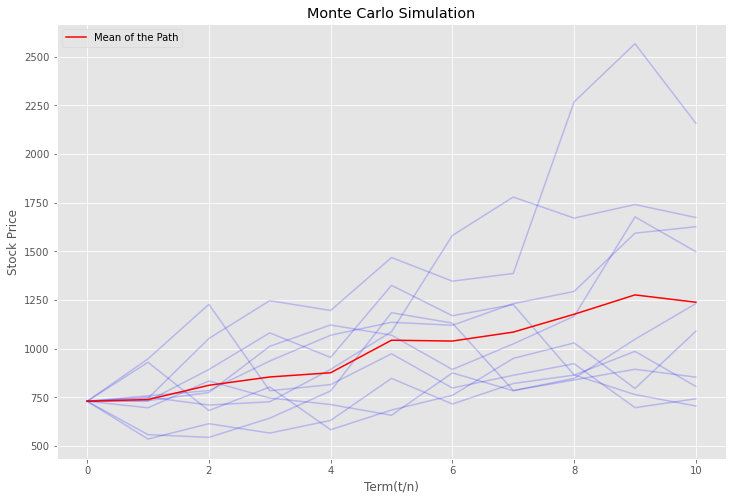

In [124]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_title('Monte Carlo Simulation')

for i in range(Simulation_DF.shape[1]):
    plt.plot(Simulation_DF['Trial '+str(i)],color='blue',alpha=0.2)

plt.plot(Simulation_DF.mean(axis=1),color='red',linestyle='-',label='Mean of the Path')
ax.set_xlabel('Term(t/n)')
ax.set_ylabel('Stock Price')
ax.legend()
plt.show()